<a href="https://colab.research.google.com/github/KAllYANI2003/Ddos_Attac_Detection_and_Prevention-/blob/main/kallyani01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
file_path = '/content/drive/MyDrive/ddos dataset.csv'
df = pd.read_csv(file_path)

In [ ]:
df = df.fillna(df.median(numeric_only=True))

In [ ]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])


In [ ]:
df['Protocol'] = df['Protocol'].astype('category').cat.codes

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12722
           1       1.00      1.00      1.00      8147

    accuracy                           1.00     20869
   macro avg       1.00      1.00      1.00     20869
weighted avg       1.00      1.00      1.00     20869



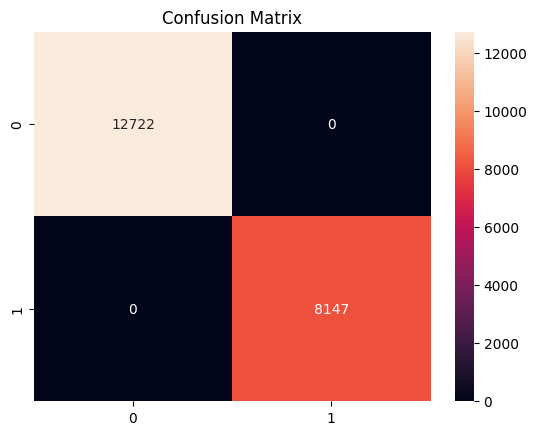

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def prevent_ddos(predictions):
    for i, pred in enumerate(predictions):
        if pred == 1:
            print(f"DDoS Attack Detected at index {i}! Blocking the IP.")
        else:
            print(f"Normal Traffic at index {i}")


In [ ]:
test_predictions = model.predict(X_test[:10])
prevent_ddos(test_predictions)

Normal Traffic at index 0
DDoS Attack Detected at index 1! Blocking the IP.
Normal Traffic at index 2
DDoS Attack Detected at index 3! Blocking the IP.
DDoS Attack Detected at index 4! Blocking the IP.
Normal Traffic at index 5
DDoS Attack Detected at index 6! Blocking the IP.
DDoS Attack Detected at index 7! Blocking the IP.
Normal Traffic at index 8
Normal Traffic at index 9


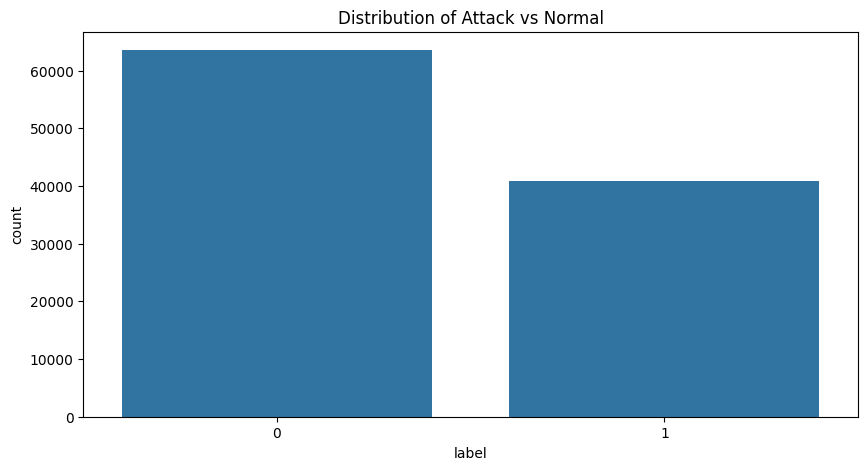

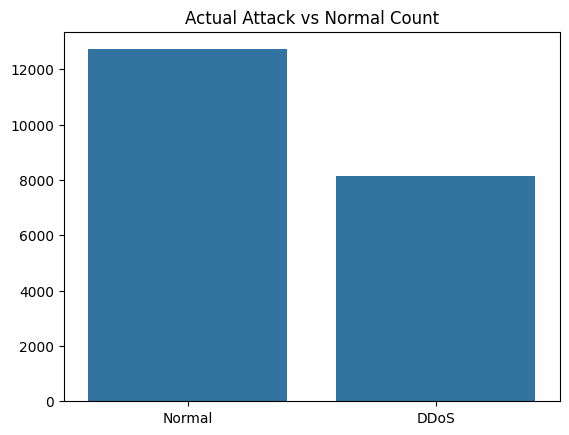

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=df)
plt.title('Distribution of Attack vs Normal')
plt.show()

sns.barplot(x=['Normal', 'DDoS'], y=[list(y_test).count(0), list(y_test).count(1)])
plt.title('Actual Attack vs Normal Count')
plt.show()


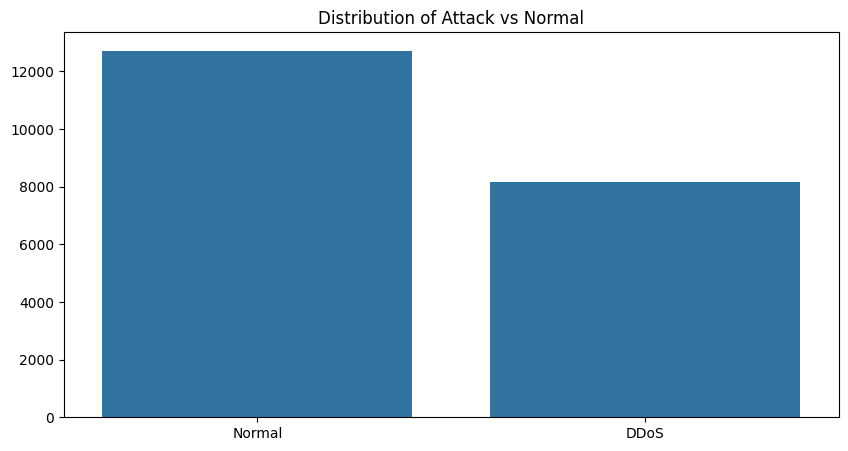

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=['Normal', 'DDoS'], y=[list(y_test).count(0), list(y_test).count(1)])
plt.title('Distribution of Attack vs Normal')
plt.show()


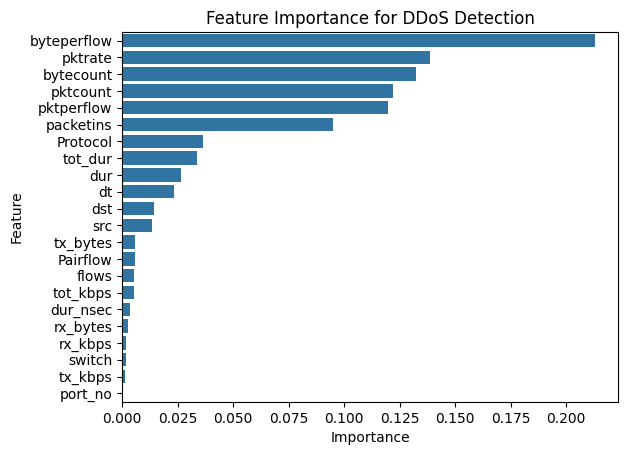

In [ ]:
feature_importances = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance for DDoS Detection')
plt.show()
